In [34]:
import numpy as np

class KNN():
    """
    K Nearest Neighbor Classifier
    Paremeters:
    ----
    k: int - number of neighbors to determine the sample's label
    """
    def __init__(self, num_neighbors=1):
        self.num_neighbors = num_neighbors
        
    def _vote(self, neighbor_labels):
        counts = np.bincount(neighbor_labels.astype(int))
        return counts.argmax()
    
    def _euclidean_dist(self, x, y):
        return np.sqrt(np.sum((x-y)**2))
    
    def predict(self, X_test, X_train, y_train):
        y_pred = np.empty(X_test.shape[0])
        
        for i, test_sample in enumerate(X_test):
            sorted_indices_by_dist_to_neighbors = np.argsort([self._euclidean_dist(test_sample, x) for x in X_train])
            k_nearest_indices = sorted_indices_by_dist_to_neighbors[:self.num_neighbors]
            k_nearest_labels = y_train[k_nearest_indices]
            
            y_pred[i] = self._vote(k_nearest_labels)
        return y_pred.astype(int)


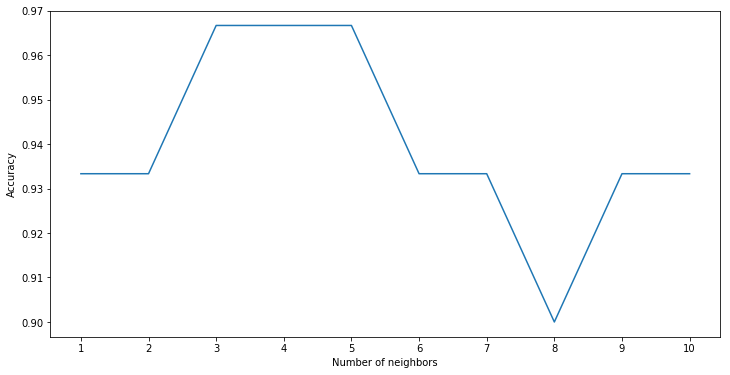

In [43]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt

X, y = sklearn.datasets.load_iris(return_X_y=True)
shuffled_indices = np.arange(X.shape[0])
np.random.shuffle(shuffled_indices)

test_prop = 0.2
train_indices = shuffled_indices[int(len(shuffled_indices) * test_prop):]
test_indices = shuffled_indices[:int(len(shuffled_indices) * test_prop)]

X_train = X[train_indices, :]
y_train = y[train_indices]

X_test = X[test_indices, :]
y_test = y[test_indices]

num_neighbors = np.arange(1, 11)
pred_acc = []
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

for num_neighbor in num_neighbors:
    knn = KNN(num_neighbor)
    y_pred = knn.predict(X_test, X_train, y_train)
    acc = np.sum(y_pred == y_test) * 1.0 / len(y_pred)
    pred_acc.append(acc)

    
ax.set_xlabel("Number of neighbors")
ax.set_ylabel("Accuracy")
ax.set_xticks(num_neighbors)

ax.plot(num_neighbors, pred_acc)
plt.show()
